In [31]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#from graphviz import Source
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#### Training and Visualizing a Decision Tree

In [5]:
iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

In [7]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [26]:
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

#Source.from_file("iris_tree.dot")

In [51]:
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

lengths, widths = np.meshgrid(
    np.linspace(0, 7.2, 100),
    np.linspace(0, 3, 100)
)

X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)

In [59]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

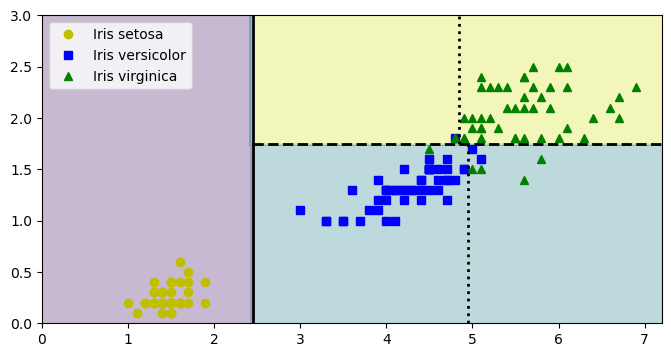

In [84]:
plt.figure(figsize=(8, 4))

plt.contourf(lengths, widths, y_pred, alpha=0.3)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx], style, label=f"Iris {name}")


tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)

plt.legend()

In [74]:
tree_clf_deeper.tree_.threshold

array([ 2.44999999, -2.        ,  1.75      ,  4.95000005, -2.        ,
       -2.        ,  4.85000014, -2.        , -2.        ])

In [76]:
tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]

array([2.44999999, 1.75      , 4.95000005, 4.85000014])

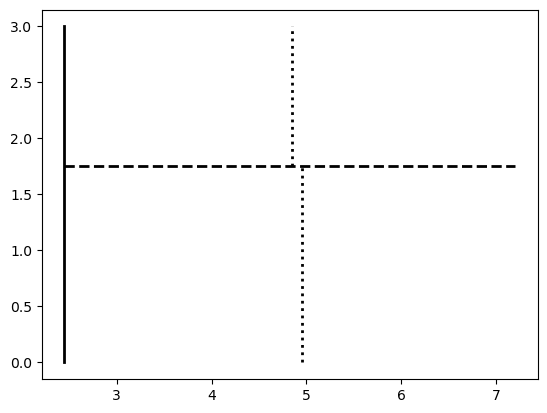

In [82]:
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)